In [88]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from math import factorial
from scipy.linalg import solveh_banded
np.set_printoptions(precision=3, linewidth=200)
from scipy.special import roots_legendre
from scipy.integrate import quad

In [89]:
def get_points(a, b, n, mode):
    if mode == 'uniform':
        points = np.linspace(a, b, n)
    elif mode == 'random':
        points = np.concatenate(([a], np.sort(np.random.rand(n - 2) * (b - a) + a), [b]))
    elif mode == 'chebyshev':
        points = (np.polynomial.chebyshev.chebpts1(n) + 1) / 2 * (b - a) + a
    else:
        print(f'incorrect mode {mode}')
        points = 0
    return np.array(points)

In [90]:
def plot(f, a, b, points, name):
    #a = a - 1
    #b = b + 1
    plot_points = get_points(a, b, int(100 * (b - a)), 'uniform')
    plt.plot(plot_points, f(plot_points), label='function')
    plt.fill_between(plot_points, f(plot_points))
    plt.plot(points, f(points), 'ro')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.show()

In [120]:
def newton_cotes(n, a, b, f, mode, verbose=False):
    points = get_points(-1, 1, n, mode)
    points_projected = (points + 1) / 2 * (b - a) + a
    l = Polynomial.fromroots(points)
    w = l.deriv()
    d = np.zeros(n)
    for i, x in enumerate(points):
        l_i  = Polynomial.fromroots(list(points[:i]) + list(points[i+1:])) / w(x)
        l_i_integr = l_i.integ()
        d[i] = l_i_integr(1) - l_i_integr(-1)
        d[i] *= (b - a) / 2
    if verbose:    
        print('d', d)
    fx = f(points_projected)
    res = np.sum(fx * d)
    print('quadrature result =', res)
    integration = quad(f, a, b)
    print('scipy integration result = ', integration[0])
    print('error =', np.abs(res - integration[0]))
    plot(f, a, b, points_projected, 'newton cotes ' + mode)

d [0.233 1.067 0.4   1.067 0.233]
quadrature result = 1.9889520838942625
scipy integration result =  1.9899924966004452
error = 0.001040412706182714


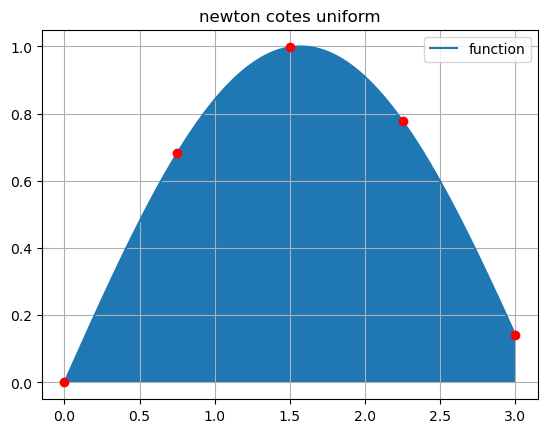

d [0.252 0.788 0.92  0.788 0.252]
quadrature result = 1.9898674914848848
scipy integration result =  1.9899924966004452
error = 0.00012500511556035043


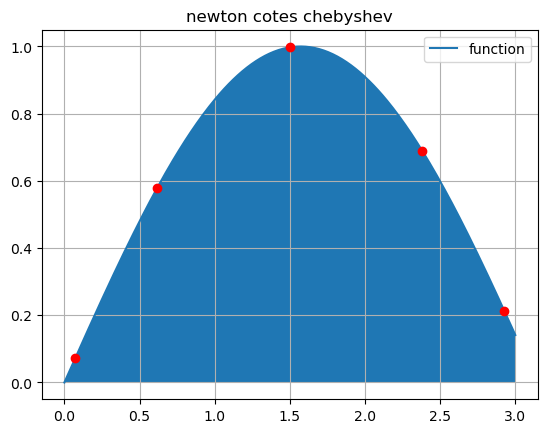

In [121]:
newton_cotes(5, 0, 3, np.sin, 'uniform', True)
newton_cotes(5, 0, 3, np.sin, 'chebyshev', True)

d [0.191 1.054 0.072 1.295 0.387 0.387 1.295 0.072 1.054 0.191]
quadrature result = 0.039813894950522837
scipy integration result =  0.03982971334963404
error = 1.5818399111203196e-05


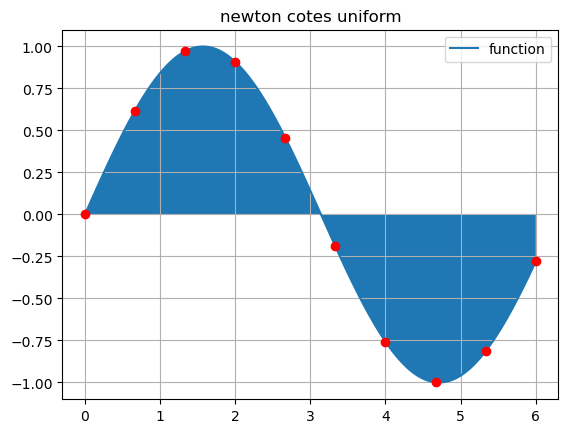

d [0.129 0.438 0.661 0.843 0.93  0.93  0.843 0.661 0.438 0.129]
quadrature result = 0.0398295008552212
scipy integration result =  0.03982971334963404
error = 2.1249441283649473e-07


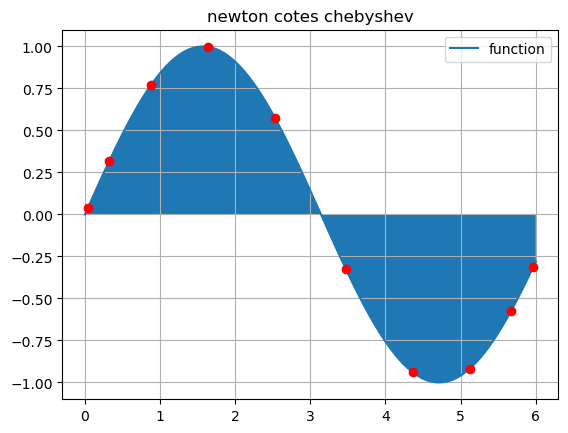

In [122]:
newton_cotes(10, 0, 6, np.sin, 'uniform', True)
newton_cotes(10, 0, 6, np.sin, 'chebyshev', True)

d [0.467 2.133 0.8   2.133 0.467]
quadrature result = 0.025093827691504145
scipy integration result =  0.03982971334963404
error = 0.014735885658129895


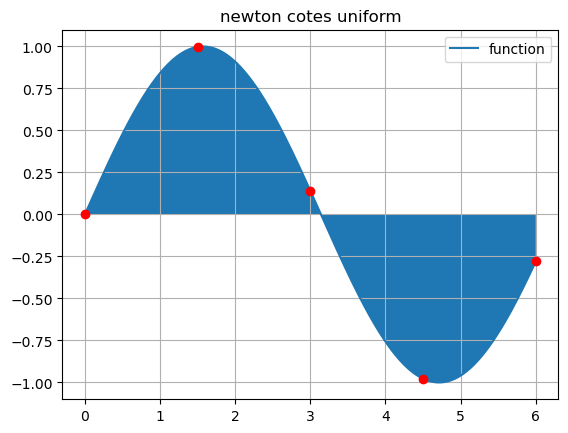

d [0.503 1.577 1.84  1.577 0.503]
quadrature result = 0.038305704629456094
scipy integration result =  0.03982971334963404
error = 0.0015240087201779454


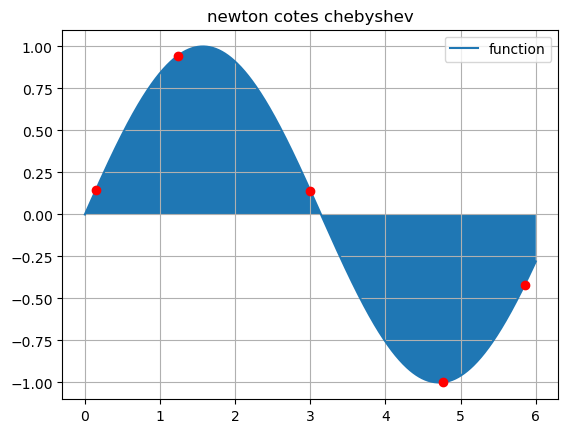

In [123]:
newton_cotes(5, 0, 6, np.sin, 'uniform', True)
newton_cotes(5, 0, 6, np.sin, 'chebyshev', True)

d [0.304 1.449 0.536 1.211 1.211 0.536 1.449 0.304]
quadrature result = 148.3774789290526
scipy integration result =  148.27782381933997
error = 0.09965510971261438


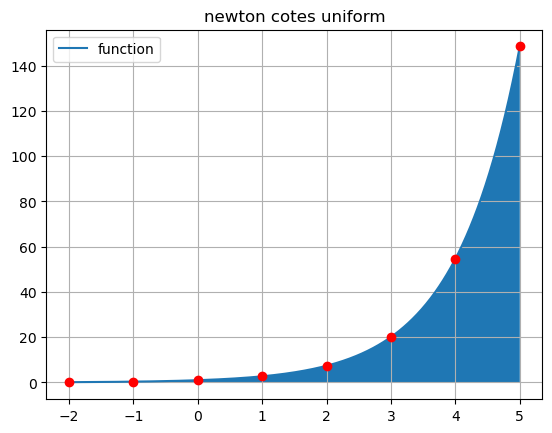

d [0.234 0.78  1.135 1.351 1.351 1.135 0.78  0.234]
quadrature result = 148.28110834494603
scipy integration result =  148.27782381933997
error = 0.003284525606062516


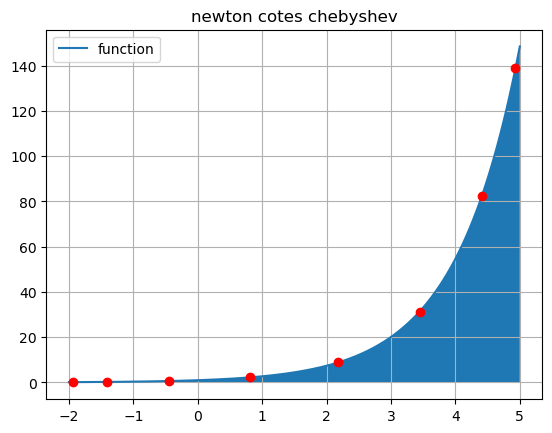

In [124]:
newton_cotes(8, -2, 5, np.exp, 'uniform', True)
newton_cotes(8, -2, 5, np.exp, 'chebyshev', True)

d [  0.216   1.705  -1.848   8.397 -15.888  30.289 -40.294  46.847 -40.294  30.289 -15.888   8.397  -1.848   1.705   0.216]
quadrature result = 22026.34854867632
scipy integration result =  22026.33045952348
error = 0.0180891528398206


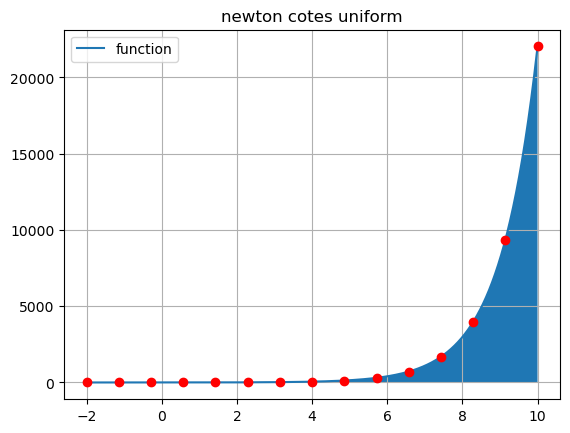

d [0.115 0.398 0.622 0.846 1.012 1.152 1.226 1.26  1.226 1.152 1.012 0.846 0.622 0.398 0.115]
quadrature result = 22026.330501961806
scipy integration result =  22026.33045952348
error = 4.243832518113777e-05


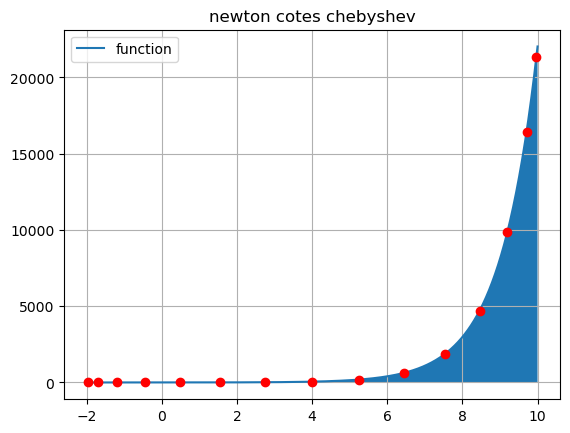

In [125]:
newton_cotes(15, -2, 10, np.exp, 'uniform', True)
newton_cotes(15, -2, 10, np.exp, 'chebyshev', True)

d [0.383 2.108 0.145 2.591 0.774 0.774 2.591 0.145 2.108 0.383]
quadrature result = 22059.42896046905
scipy integration result =  22026.33045952348
error = 33.09850094556896


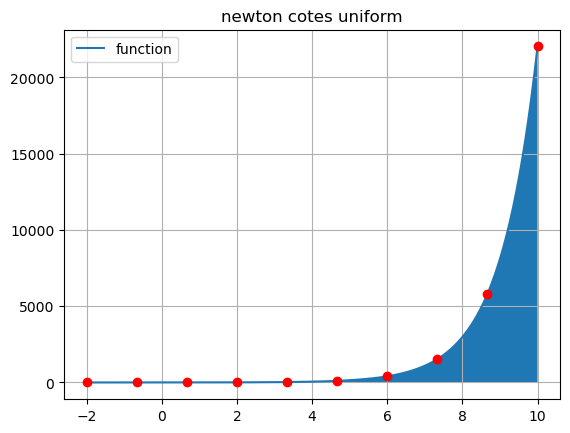

d [0.258 0.875 1.322 1.685 1.86  1.86  1.685 1.322 0.875 0.258]
quadrature result = 22026.87625833205
scipy integration result =  22026.33045952348
error = 0.5457988085690886


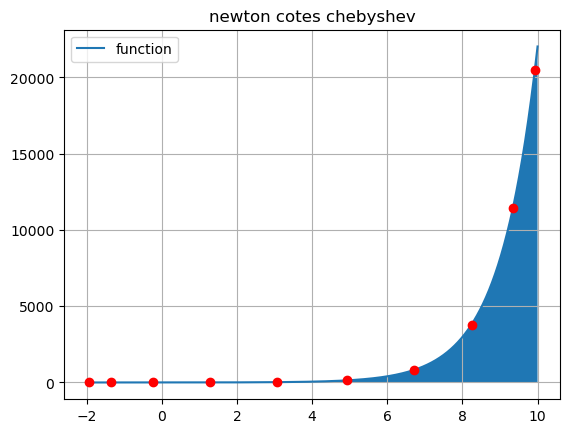

In [126]:
newton_cotes(10, -2, 10, np.exp, 'uniform', True)
newton_cotes(10, -2, 10, np.exp, 'chebyshev', True)

In [132]:
def gauss(n, a, b, f, verbose=False):
    points = roots_legendre(n)[0]
    points_projected = (points + 1) / 2 * (b - a) + a
    l = Polynomial.fromroots(points)
    w = l.deriv()
    d = np.zeros(n)
    for i, x in enumerate(points):
        l_i  = Polynomial.fromroots(list(points[:i]) + list(points[i+1:])) / w(x)
        l_i_integr = l_i.integ()
        d[i] = l_i_integr(1) - l_i_integr(-1)
        d[i] *= (b - a) / 2
    if verbose:    
        print('d', d)
    fx = f(points_projected)
    res = np.sum(fx * d)
    print('quadrature result =', res)
    integration = quad(f, a, b)
    print('scipy integration result = ', integration[0])
    print('error =', np.abs(res - integration[0]))
    plot(f, a, b, points_projected, 'gauss')

d [0.833 1.333 0.833]
quadrature result = 1.9910024337865229
scipy integration result =  1.9899924966004452
error = 0.0010099371860776696


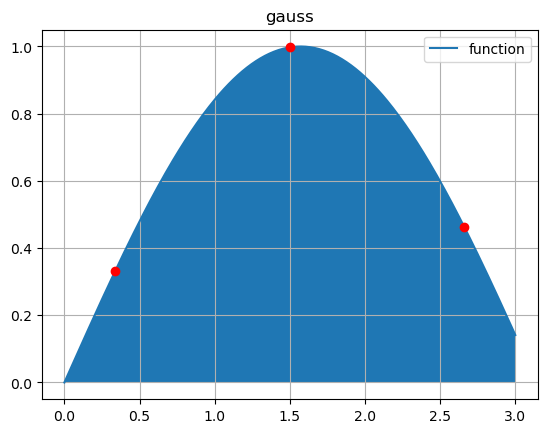

d [0.667 1.667 0.667]
quadrature result = 2.019495826062478
scipy integration result =  1.9899924966004452
error = 0.029503329462032823


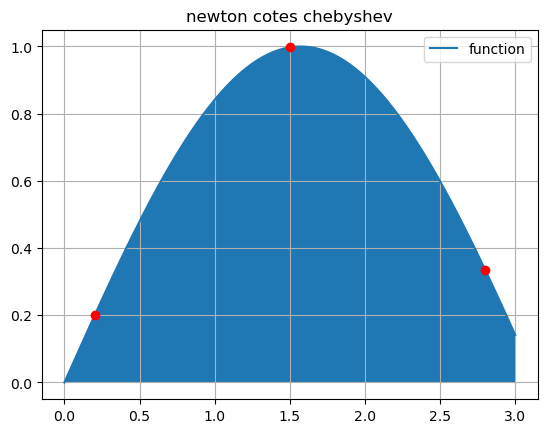

In [133]:
gauss(3, 0, 3, np.sin, True)
newton_cotes(3, 0, 3, np.sin, 'chebyshev', True)

d [1.185 2.393 2.844 2.393 1.185]
quadrature result = 1.8167425986147587
scipy integration result =  1.8390715290764525
error = 0.02232893046169382


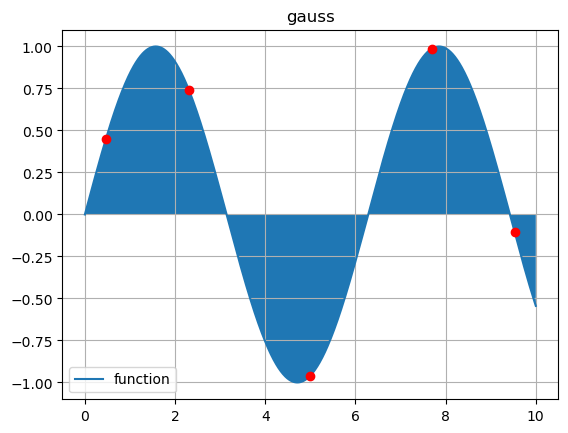

d [0.839 2.628 3.067 2.628 0.839]
quadrature result = 1.926810849350383
scipy integration result =  1.8390715290764525
error = 0.0877393202739305


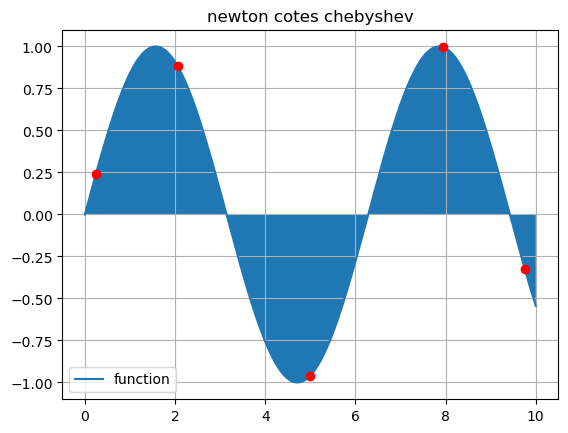

In [134]:
gauss(5, 0, 10, np.sin, True)
newton_cotes(5, 0, 10, np.sin, 'chebyshev', True)

d [1.028 2.165 2.807 2.807 2.165 1.028]
quadrature result = 22024.27558551389
scipy integration result =  22026.33045952348
error = 2.0548740095910034


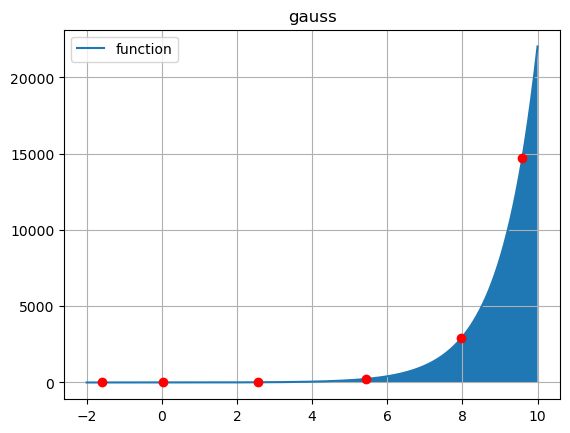

d [0.712 2.267 3.021 3.021 2.267 0.712]
quadrature result = 22211.09236233018
scipy integration result =  22026.33045952348
error = 184.76190280669834


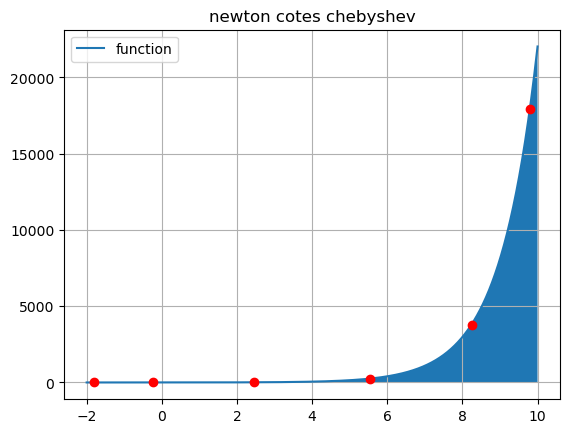

In [135]:
gauss(6, -2, 10, np.exp, True)
newton_cotes(6, -2, 10, np.exp, 'chebyshev', True)

In [313]:
def proj(a, b, x):
    # x from [a, b] to [-1,1]
    return 2 * (x - a) / (b - a) - 1

def proj_inv(a, b, x):
    # x from [-1, 1] to [a, b]
    return (x * (b - a) + a + b) / 2

def clenshaw_curtis(n, a, b, f, mode, verbose=False):
    points = np.array([np.cos(np.pi * i / n) for i in range(n)])
    halfn = n // 2
    coef = 2 / (b - a)
    numer = np.zeros(halfn)
    denom = np.array([1] + [2 / (1 - 4*k**2) for k in range(1, halfn)])
    for k in range(halfn):
        a2k = (f(proj_inv(a, b, 1)) + f(proj_inv(a, b, -1))) / 2
        for j in range(1, n):
            a2k += f(proj_inv(a, b, np.cos(np.pi * j / n))) * np.cos(j * 2 * k * np.pi / n)
        numer[k] = 2 * a2k / n
    if verbose:
        print(coef)
        
        print(numer)
        print(denom)
    res = np.sum(numer * denom) / coef
    print('quadrature result =', res)
    integration = quad(f, a, b)
    print('scipy integration result = ', integration[0])
    print('error =', np.abs(res - integration[0]))
    plot(f, a, b, proj_inv(a, b, points), 'clenshaw curtis')

quadrature result = -0.4196547088157006
scipy integration result =  -0.41986798078222676
error = 0.00021327196652615177


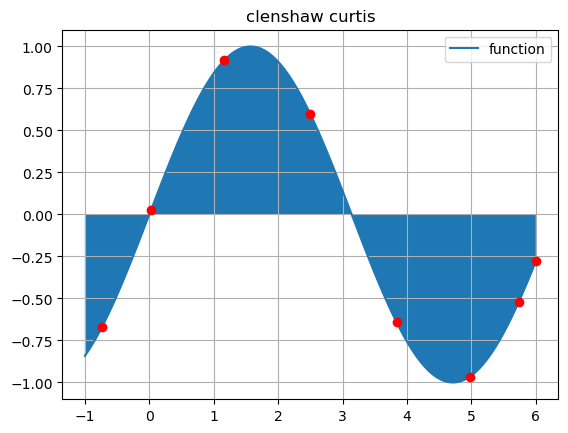

d [0.354 0.778 1.098 1.269 1.269 1.098 0.778 0.354]
quadrature result = -0.4198679827752956
scipy integration result =  -0.41986798078222676
error = 1.9930688210934022e-09


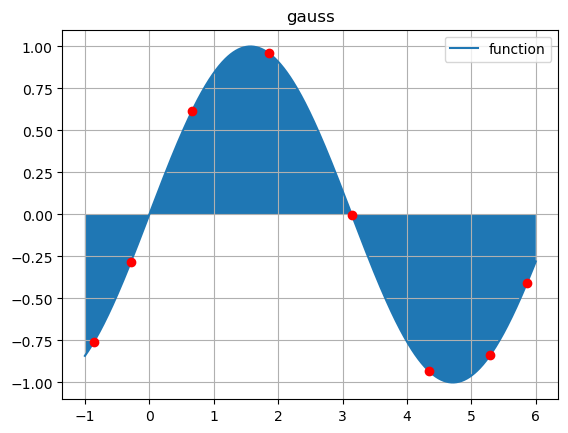

d [0.234 0.78  1.135 1.351 1.351 1.135 0.78  0.234]
quadrature result = -0.4196801447220784
scipy integration result =  -0.41986798078222676
error = 0.00018783606014838305


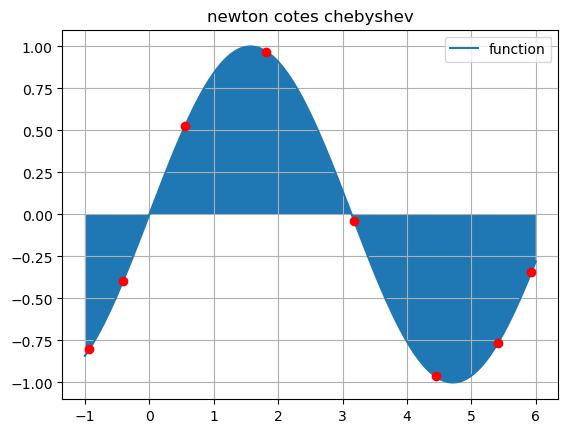

In [320]:
clenshaw_curtis(8, -1, 6, np.sin, True)
gauss(8, -1, 6, np.sin, True)
newton_cotes(8, -1, 6, np.sin, 'chebyshev', True)

quadrature result = -1.6140737910741345
scipy integration result =  -1.6138139075139777
error = 0.0002598835601568261


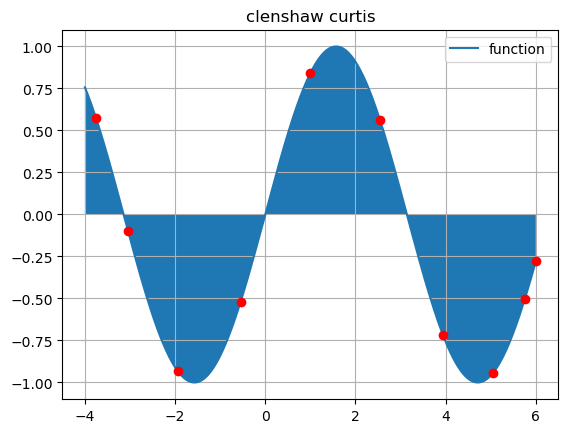

d [0.333 0.747 1.095 1.346 1.478 1.478 1.346 1.095 0.747 0.333]
quadrature result = -1.613813907876737
scipy integration result =  -1.6138139075139777
error = 3.627593780919369e-10


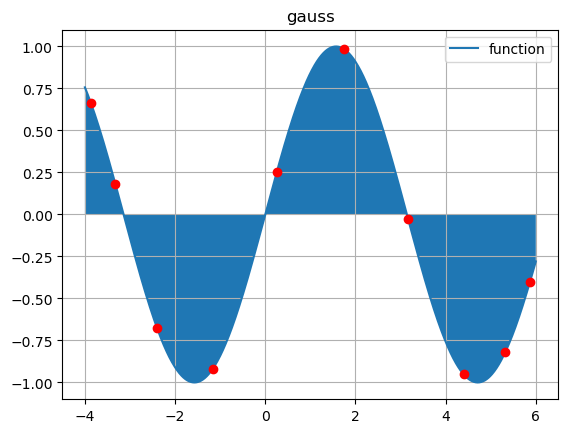

d [0.215 0.729 1.102 1.404 1.55  1.55  1.404 1.102 0.729 0.215]
quadrature result = -1.614035579133883
scipy integration result =  -1.6138139075139777
error = 0.00022167161990527262


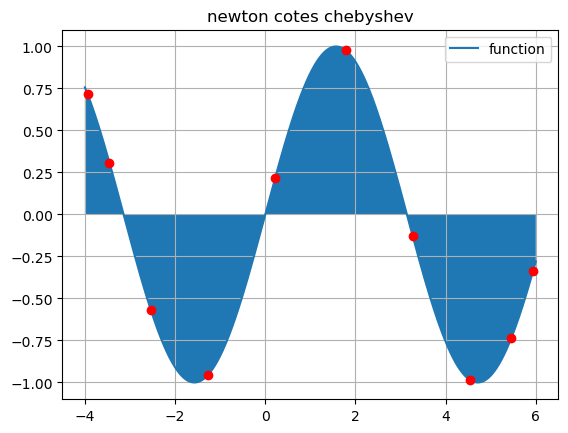

In [321]:
clenshaw_curtis(10, -4, 6, np.sin, True)
gauss(10, -4, 6, np.sin, True)
newton_cotes(10, -4, 6, np.sin, 'chebyshev', True)

quadrature result = 403.4128877662887
scipy integration result =  403.4104778538465
error = 0.0024099124422036766


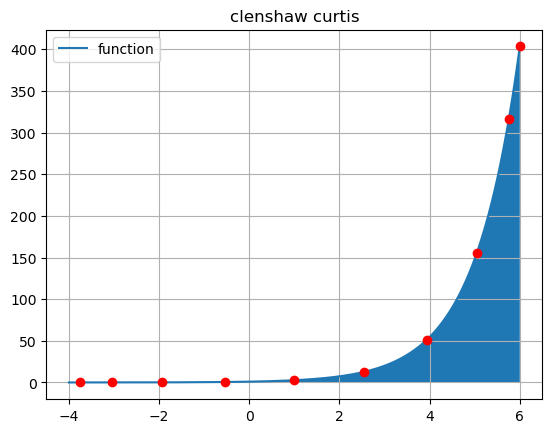

d [0.333 0.747 1.095 1.346 1.478 1.478 1.346 1.095 0.747 0.333]
quadrature result = 403.41047785177625
scipy integration result =  403.4104778538465
error = 2.070237314910628e-09


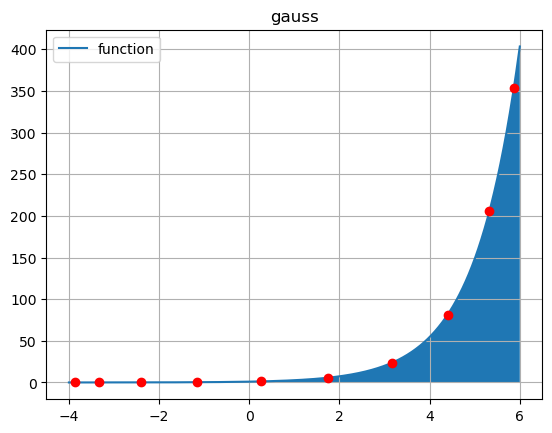

d [0.215 0.729 1.102 1.404 1.55  1.55  1.404 1.102 0.729 0.215]
quadrature result = 403.41325366495425
scipy integration result =  403.4104778538465
error = 0.0027758111077673675


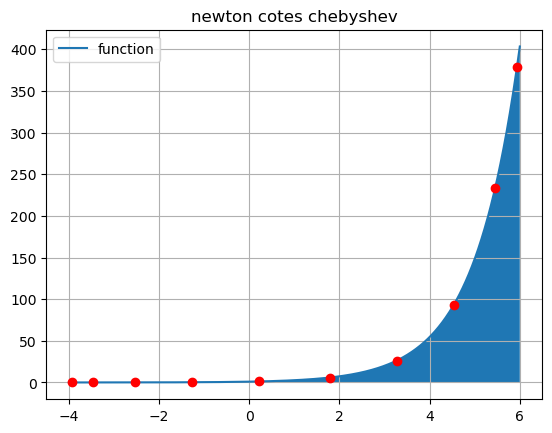

In [322]:
clenshaw_curtis(10, -4, 6, np.exp, True)
gauss(10, -4, 6, np.exp, True)
newton_cotes(10, -4, 6, np.exp, 'chebyshev', True)